In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import tensorflow
from tensorflow.keras.models import Sequential 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding,Bidirectional,LSTM,Dense,Dropout
from tensorflow.keras.utils import to_categorical

2021-09-15 18:11:25.947028: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


In [3]:
df=pd.read_csv('../input/twitter-and-reddit-sentimental-analysis-dataset/Reddit_Data.csv')
df.head(5)

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


# Exploratory Data Analysis

In [4]:
dist=list(df.category)
pp=[0,0,0]
for i in dist:
    if i==-1:
        pp[0]+=1
    elif i==0:
        pp[1]+=1
    else:
        pp[2]+=1
print(pp)
        


[8277, 13142, 15830]


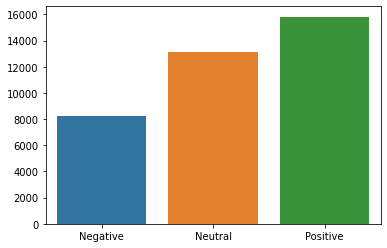

In [5]:
labels=['Negative','Neutral','Positive']
sns.barplot(x=labels,y=pp)
plt.show()

In [6]:
comment=list(df.clean_comment.astype(str))
sentiment=list(df.category)
reddit_dict=dict(zip(comment,sentiment))

In [7]:
print(list(reddit_dict.items())[:5])

[(' family mormon have never tried explain them they still stare puzzled from time time like some kind strange creature nonetheless they have come admire for the patience calmness equanimity acceptance and compassion have developed all the things buddhism teaches ', 1), ('buddhism has very much lot compatible with christianity especially considering that sin and suffering are almost the same thing suffering caused wanting things shouldn want going about getting things the wrong way christian this would mean wanting things that don coincide with god will and wanting things that coincide but without the aid jesus buddhism could also seen proof god all mighty will and omnipotence certainly christians are lucky have one such christ there side but what about everyone else well many christians believe god grace salvation and buddhism god way showing grace upon others would also help study the things jesus said and see how buddha has made similar claims such rich man getting into heaven joke 

In [8]:
Neg_list=[]
Pos_list=[]
Neutral_list=[]
for i,j in reddit_dict.items():
    if j==-1:
        Neg_list.append(i)
    elif j==0:
        Neutral_list.append(i)
    else:
        Pos_list.append(i)    

In [9]:
print(Neg_list[:2],'\n',Neutral_list[:2],'\n',Pos_list[:2])

['seriously don say thing first all they won get its too complex explain normal people anyway and they are dogmatic then doesn matter what you say see mechante post and for any reason you decide later life move from buddhism and that doesn suit you identity though you still get keep all the wisdom then your family will treat you like you went through weird hippy phase for while there didncha and you never hear the end pro tip don put one these your wall jpg ', 'you should all sit down together and watch the simpsons episode where lisa becomes buddhist simpsons season episode she little faith then discuss '] 
 ['what you have learned yours and only yours what you want teach different focus the goal not the wrapping paper buddhism can passed others without word about the buddha ', 'jesus was zen meets jew '] 
 [' family mormon have never tried explain them they still stare puzzled from time time like some kind strange creature nonetheless they have come admire for the patience calmness e

In [11]:
pos_len=[]
for i in Pos_list:
    pos_len.append(len(i))

In [12]:
neg_len=[]
for i in Neg_list:
    neg_len.append(len(i))

In [13]:
Neutral_len=[]
for i in Neutral_list:
    Neutral_len.append(len(i))

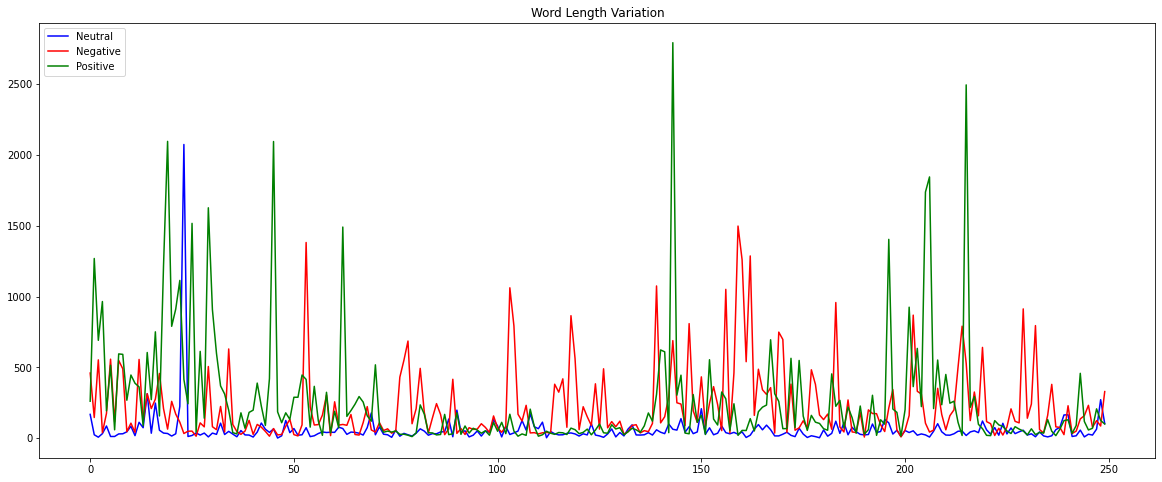

In [14]:
plt.subplots(figsize=(20,8))
plt.title("Word Length Variation")
plt.plot(Neutral_len[:250],c='b',label='Neutral')
plt.plot(neg_len[:250],c='r',label='Negative')
plt.plot(pos_len[:250],c='g',label='Positive')
plt.legend(loc='upper left')
plt.show()

In [15]:
pos_mean=sum(pos_len)//len(pos_len)
neg_mean=sum(neg_len)//len(neg_len)
neutral_mean=sum(Neutral_len)//len(Neutral_len)
combined_mean=(sum(pos_len)+sum(neg_len)+sum(Neutral_len))//(len(pos_len)+len(neg_len)+len(Neutral_len))

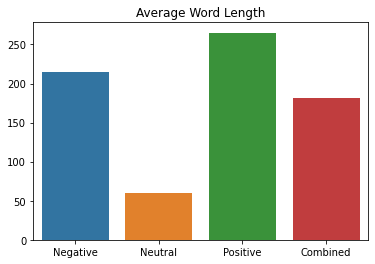

In [16]:
plt.title("Average Word Length")
sns.barplot(x=['Negative','Neutral','Positive','Combined'],y=[neg_mean,neutral_mean,pos_mean,combined_mean])
plt.show()

# Tokeinzer


In [35]:
X=df['clean_comment'].astype('str')
X[:5]

0     family mormon have never tried explain them t...
1    buddhism has very much lot compatible with chr...
2    seriously don say thing first all they won get...
3    what you have learned yours and only yours wha...
4    for your own benefit you may want read living ...
Name: clean_comment, dtype: object

In [36]:
lp=""
for i in X:
    lp+=i+" "
print(lp[:100])

 family mormon have never tried explain them they still stare puzzled from time time like some kind 


In [37]:
st=lp.split(' ')
dict_len=len(set(st))

In [38]:
dict_len,len(st)

(55543, 1134781)

In [39]:
tokenizer=Tokenizer(num_words=dict_len,lower=True,oov_token="OOV")
tokenizer.fit_on_texts(X)

In [40]:
len(tokenizer.word_index)


54720

In [41]:
X_train=tokenizer.texts_to_sequences(X)
X_train_padded=pad_sequences(X_train,maxlen=175,padding='post',truncating='post')

In [42]:
X_train[:2]

[[255,
  27343,
  11,
  123,
  642,
  871,
  40,
  10,
  95,
  12295,
  16336,
  24,
  54,
  54,
  22,
  43,
  290,
  4165,
  14016,
  7561,
  10,
  11,
  129,
  3150,
  6,
  2,
  5394,
  19936,
  11063,
  6437,
  3,
  4417,
  11,
  1440,
  19,
  2,
  112,
  1519,
  8055],
 [1519,
  20,
  78,
  73,
  83,
  7127,
  12,
  2851,
  454,
  1144,
  4,
  7128,
  3,
  1710,
  8,
  383,
  2,
  45,
  93,
  1710,
  1857,
  2984,
  112,
  961,
  91,
  88,
  26,
  191,
  112,
  2,
  202,
  79,
  1320,
  5,
  36,
  263,
  2984,
  112,
  4,
  39,
  19937,
  12,
  303,
  14,
  3,
  2984,
  112,
  4,
  19937,
  13,
  182,
  2,
  2852,
  2381,
  1519,
  120,
  60,
  246,
  709,
  303,
  19,
  5184,
  14,
  3,
  19938,
  1407,
  1469,
  8,
  2382,
  11,
  31,
  102,
  4290,
  28,
  363,
  13,
  17,
  26,
  190,
  285,
  76,
  92,
  1469,
  198,
  303,
  6438,
  11064,
  3,
  1519,
  303,
  79,
  891,
  6438,
  1145,
  280,
  36,
  60,
  228,
  1520,
  2,
  112,
  2381,
  87,
  3,
  67,
  33,
  882,
  20,

# One Hot Encode The Sentiment Values

In [43]:
df['category']=df['category'].replace({-1:2})

In [44]:
mp={0:"Neutral",1:"Positve",2:"Negative"}

In [45]:
Y=df['category'].values

In [46]:
Y_hot=to_categorical(Y)

In [47]:
print(Y_hot[:3])

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


# The Model

In [50]:
model=Sequential()
model.add(Embedding(dict_len,64,input_length=175))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(175,return_sequences=True)))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(350,return_sequences=True)))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(700)))
model.add(Dense(3,activation='softmax'))
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 175, 64)           3554752   
_________________________________________________________________
dropout_5 (Dropout)          (None, 175, 64)           0         
_________________________________________________________________
bidirectional_7 (Bidirection (None, 175, 350)          336000    
_________________________________________________________________
dropout_6 (Dropout)          (None, 175, 350)          0         
_________________________________________________________________
bidirectional_8 (Bidirection (None, 175, 700)          1962800   
_________________________________________________________________
dropout_7 (Dropout)          (None, 175, 700)          0         
_________________________________________________________________
bidirectional_9 (Bidirection (None, 1400)             

In [51]:
model.compile(optimizer='adam',metrics=['accuracy'],loss='categorical_crossentropy')


In [52]:
hist=model.fit(X_train_padded,Y_hot,epochs=5,validation_split=0.2)

Epoch 1/5
932/932 [==============================] - 194s 201ms/step - loss: 0.7658 - accuracy: 0.6659 - val_loss: 0.2945 - val_accuracy: 0.9051
Epoch 2/5
932/932 [==============================] - 185s 199ms/step - loss: 0.2493 - accuracy: 0.9150 - val_loss: 0.2335 - val_accuracy: 0.9208
Epoch 3/5
932/932 [==============================] - 186s 200ms/step - loss: 0.1412 - accuracy: 0.9545 - val_loss: 0.2849 - val_accuracy: 0.9181
Epoch 4/5
932/932 [==============================] - 185s 199ms/step - loss: 0.0895 - accuracy: 0.9735 - val_loss: 0.2569 - val_accuracy: 0.9240
Epoch 5/5
932/932 [==============================] - 185s 199ms/step - loss: 0.0664 - accuracy: 0.9814 - val_loss: 0.3269 - val_accuracy: 0.9205


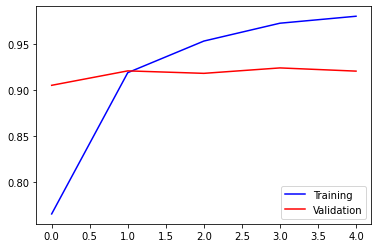

In [56]:
plt.plot(hist.history['accuracy'],c='b',label='Training')
plt.plot(hist.history['val_accuracy'],c='r',label='Validation')
plt.legend(loc='lower right')
plt.show()

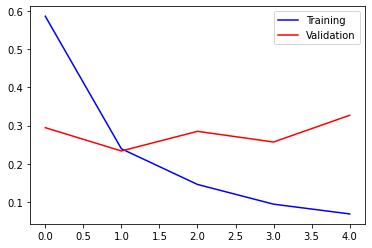

In [58]:
plt.plot(hist.history['loss'],c='b',label='Training')
plt.plot(hist.history['val_loss'],c='r',label='Validation')
plt.legend(loc='upper right')
plt.show()

# Check For Your Own Data

In [82]:
def predict(s):
    X_tes=[]
    X_tes.append(s)
    X_test=tokenizer.texts_to_sequences(X_tes)
    X_test_padded=pad_sequences(X_test,maxlen=175,padding='post',truncating='post')
    sent=int(model.predict_classes(X_test_padded))
    print("The Predicted Sentiment is ",mp[sent])

In [83]:
pol="The article is good but its not great moreover i would say you have done a decent job"
predict(pol)

The Predicted Sentiment is  Positve


In [84]:
lop="You have done a stupid mistake which made you lose all the progress you made"
predict(lop)

The Predicted Sentiment is  Negative


In [85]:
com="It aint hard work but its honest work"
predict(com)

The Predicted Sentiment is  Positve


In [87]:
ppp="Lets Find out what this is going to be classified as"
predict(ppp)

The Predicted Sentiment is  Neutral
